目录：
* 梯度下降法算法简介
* 实现梯度下降法Batch_gradient_descent
* 使用梯度下降法的注意事项
* 实现随机梯度下降法Stochastic_gradient_descent
* 实现小批量梯度下降法mini_batch_gradient_descent
* 梯度下降法的调试

# 梯度下降法算法简介
梯度下降法沿梯度向量的反方向进行迭代以得到函数的极值点，参数迭代公式：
$$X_{k+1} = X_{k} - \eta \nabla f(X_k)$$

其中，$\eta$为学习率


$\eta$的设置：
* eta一般取0.01
* 取值会影响获得最优解的速度
* 取值不合适甚至得不到最优解


设置迭代停止条件：

1. 最大迭代次数T，迭代次数大于T时停止迭代

2. 停止搜索条件$|\nabla f(X_{k+1})|<\epsilon$，满足条件时停止



算法的问题：
1. 只能到达局部极值点-->多次运行，随机化初始值
2. 到达鞍点

# 实现梯度下降法
以函数
$f(x)=x_1^2+x_2^2为例$

梯度$\nabla f(x) = \begin{pmatrix}2x_1 \\2x_2\end{pmatrix}$

迭代公式为
$x_{k+1}=x_{k} - \eta\nabla f(x)$

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def dJ(x):
    return 2*x


def gradient_descent(inital_x,eta=0.01,maxiter=1e4,epsilon=1e-8):
    x_history = []
    x_history.append(inital_x)
    x = inital_x
    gradient = dJ(x)
    i_iter = 0
    while i_iter < maxiter:
        x_next = x - eta * gradient
        x_history.append(x_next)
        gradient = dJ(x_next)
        if abs(gradient[0])<epsilon and abs(gradient[1])<epsilon:
            break
        i_iter +=1
        x = x_next
    return np.array(x_history)

def plot_x_history(inital_x,eta=0.01):
    X1 = np.arange(-4,4,0.25)
    X2 = np.arange(-4,4,0.25)
    X1,X2 = np.meshgrid(X1,X2)
    Z = X1**2+X2**2
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(X1,X2,Z,alpha=0.5)
    
    res = gradient_descent(inital_x=inital_x,eta=eta)
    ax.scatter(res[:,0],res[:,1],res[:,0]**2+res[:,1]**2,marker='o',color='r')
    plt.show()
    

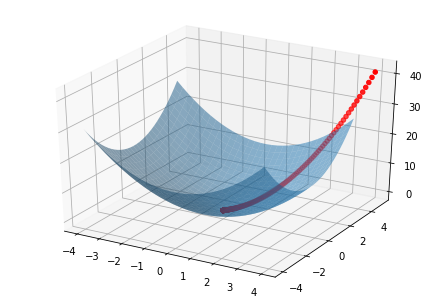

In [132]:
plot_x_history(np.array([4,5]))

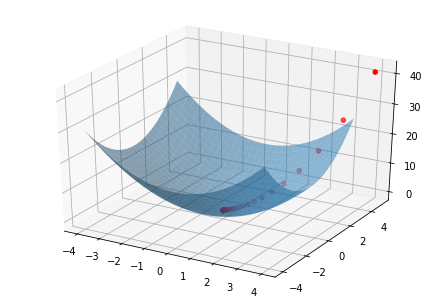

In [118]:
plot_x_history(np.array([4,5]),eta=0.1)

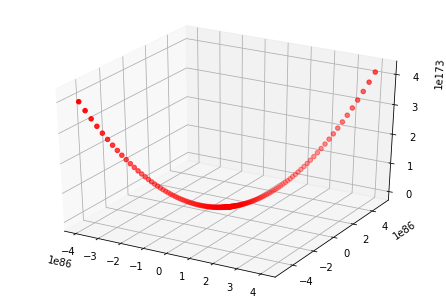

In [126]:
plot_x_history(np.array([4,5]),eta=1.01)

总结：
当$\eta$值过大时，则无法收敛

# 线性回归中使用梯度下降法
梯度下降的迭代公式：
$$X_{k+1}=X_k-\eta \nabla f(X_k)$$

线性回归的loss function：
$$\frac{1}{m}\sum\limits_{i=1}^m (\hat y-y)^2\\
= \frac{1}{m}(y-Xw)^T(y-Xw)$$

梯度为
$$\nabla_w = \frac{2}{m}(X^TXw-X^Ty)$$

In [411]:
import numpy as np
class LinearRegression():
    def __init__(self):
        """初始化linear regression模型"""
        self.coef_ = None #w的系数
        self.interception_= None #截距
        self._theta = None

    
    def fit_gd(self,X_train,y_train,eta=0.01,maxiter=1e4,epsilon=1e-10):
        """根据训练数据集x_train和y_train，使用梯度下降法训练Linear Regression模型"""
        assert X_train.shape[0] == len(y_train), 'the size of X_train must be equal to the size of y_train'
        
        def dJ(theta,X_b,y):
            return (X_b.T).dot(X_b.dot(theta)-y)*2/len(X_b)
        
        def J(theta,X_b,y):
            try:
                return (X_b.dot(theta)-y).dot(X_b.dot(theta)-y)/len(X_b)
            except:
                return float('inf')
    
        def gradient_descent(X_b,y,inital_theta,eta,maxiter,epsilon):
            theta = inital_theta
            i_iter = 0 
            
            while i_iter < maxiter:
                theta_next = theta - eta * dJ(theta,X_b,y)
                if abs(J(theta_next,X_b,y)-J(theta,X_b,y)) < epsilon:
                    break
                    
                theta = theta_next
                i_iter += 1
            

            print("i_iter=",i_iter)
            return theta
            
            
        X_b = np.hstack([np.ones((X_train.shape[0],1)),X_train])
        inital_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b,y_train,inital_theta,eta,maxiter,epsilon)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self
        
        
    def predict(self,X_predict):
        """给待测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._theta is not None,'must fit before predict'
        assert len(self._theta) == X_predict.shape[1]+1,'the feature number of X_predict must be equal to X_train'
        X_b_pre = np.hstack([np.ones((X_predict.shape[0],1)),X_predict])
        return X_b_pre.dot(self._theta)
    
    def __repr__(self):
        return "LinearReression"

## 使用自己造的虚拟数据进行验证

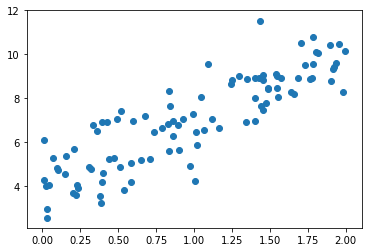

In [241]:
np.random.seed(666)
X=2 * np.random.random(size=100)
y=X*3 + 4+np.random.normal(size=100)
X = X.reshape(-1,1)
plt.scatter(X,y)

In [242]:
reg = LinearRegression()
reg.fit_gd(X,y) 

i_iter= 2426


LinearReression

In [243]:
reg.coef_

array([3.00536406])

In [244]:
reg.interception_

4.023471886068193

## 使用波士顿房价数据进行预测

In [397]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
X = boston.data
y = boston.target
X = X[ y<50 ]
y = y[ y<50 ]
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [283]:
reg = LinearRegression()
reg.fit_gd(X_train,y_train) 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply


i_iter= 10000


LinearReression

In [284]:
reg.coef_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

会发现由于系数太大，导致无法得到最终结果，故再使用梯度下降之前，需要进行数据标准化

In [398]:
X_train_std = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
X_test_std = (X_test - X_train.mean(axis=0))/X_train.std(axis=0)

In [286]:
reg = LinearRegression()
reg.fit_gd(X_train_std,y_train)
predict = reg.predict(X_test_std)

i_iter= 6802


In [287]:
from sklearn.metrics import r2_score
r2_score(y_test,predict)

0.7204690209588285

在进行数据归一化后，可以正常使用梯度下降法

# 随机梯度下降法(Stochastic Gradient Descent)

当样本量比较大时，计算梯度会比较慢，所以有了改进方式

随机梯度下降法的变化：
* 每次只选取一个样本计算梯度，作为搜索方向

$$ 2*X_b^{(i)T}(X_b^{(i)}w-y^{(i)})$$
* 学习率：
$$ \eta = \frac{a}{b+i_iter}$$
随着迭代次数的增加，学习率逐步减小，防止跳出最小值

    b的作用，防止在初试的时候，学习率下降太快

    经验取值:
    a=5
    b=50
* 迭代结束只看循环次数


In [317]:
import numpy as np
class LinearRegression():
    def __init__(self):
        """初始化linear regression模型"""
        self.coef_ = None #w的系数
        self.interception_= None #截距
        self._theta = None
    
    
    def fit_sgd(self,X_train,y_train,maxiter=1e4,epsilon=1e-10):
        """使用随机梯度下降法完成模型的拟合"""
        def dJ_sgd(theta,X_b_i,y_i):
            return (X_b_i.T).dot(X_b_i.dot(theta)-y_i)*2
        
        def learning_rate(t):
            t0=5
            t1=50
            return t0/(t+t1)
        
        def sgd(X_b,y,inital_theta,maxiter):
            theta = inital_theta
            for i in range(int(maxiter)):
                rand_i = np.random.randint(len(X_b))
                gradient = dJ_sgd(theta,X_b[rand_i],y[rand_i])
                theta = theta - learning_rate(i)*gradient
            return theta
        
        X_b = np.hstack([np.ones((len(X_train),1)),X_train])
        inital_theta = np.zeros(X_b.shape[1])
        theta = sgd(X_b,y_train,inital_theta,maxiter=maxiter)
        self._theta = theta
        self.interception_ = theta[0]
        self.coef_ = theta[1:]
        
        
    def predict(self,X_predict):
        """给待测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._theta is not None,'must fit before predict'
        assert len(self._theta) == X_predict.shape[1]+1,'the feature number of X_predict must be equal to X_train'
        X_b_pre = np.hstack([np.ones((X_predict.shape[0],1)),X_predict])
        return X_b_pre.dot(self._theta)
    
    def __repr__(self):
        return "LinearReression"

In [318]:
reg = LinearRegression()
reg.fit_sgd(X_train_std,y_train)
predict = reg.predict(X_test_std)
r2_score(y_test,predict)

0.7079311294605417

多次尝试，会发现结果的随机性非常大
故进行改进，令其在循环时，保证每一个样本点都会被用到

In [386]:
import numpy as np
class LinearRegression():
    def __init__(self):
        """初始化linear regression模型"""
        self.coef_ = None #w的系数
        self.interception_= None #截距
        self._theta = None
    
    
    def fit_sgd(self,X_train,y_train,maxiter=5,epsilon=1e-10):#maxiter表示样本被看几圈
        """使用随机梯度下降法完成模型的拟合"""
        def dJ_sgd(theta,X_b_i,y_i):
            return (X_b_i.T).dot(X_b_i.dot(theta)-y_i)*2
        
        def learning_rate(t):
            t0=5
            t1=50
            return t0/(t+t1)
        
        def sgd(X_b,y,inital_theta,maxiter):
            theta = inital_theta
            for _ in range(maxiter):
                indexes = np.random.permutation(len(X_b))
                X_b_new = X_b[indexes]
                y_new = y[indexes]
                for i in range(len(X_b)):
                    gradient = dJ_sgd(theta,X_b_new[i],y_new[i])
                    theta = theta - learning_rate(_*len(X_b)+i)*gradient
            return theta
        
        X_b = np.hstack([np.ones((len(X_train),1)),X_train])
        inital_theta = np.zeros(X_b.shape[1])
        theta = sgd(X_b,y_train,inital_theta,maxiter=maxiter)
        self._theta = theta
        self.interception_ = theta[0]
        self.coef_ = theta[1:]
        
        
    def predict(self,X_predict):
        """给待测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._theta is not None,'must fit before predict'
        assert len(self._theta) == X_predict.shape[1]+1,'the feature number of X_predict must be equal to X_train'
        X_b_pre = np.hstack([np.ones((X_predict.shape[0],1)),X_predict])
        return X_b_pre.dot(self._theta)
    
    def __repr__(self):
        return "LinearReression"

In [400]:
reg = LinearRegression()
reg.fit_sgd(X_train_std,y_train,maxiter=100)
predict = reg.predict(X_test_std)
r2_score(y_test,predict)

0.8148023952755643

# scikit-learn中的SGD

In [408]:
from sklearn.linear_model import SGDRegressor #只能解决线性模型
sgd_reg = SGDRegressor(n_iter=100)#n_iter浏览多少遍
sgd_reg.fit(X_train_std,y_train)
sgd_reg.score(X_test_std,y_test)

0.8176292677242758

# 梯度下降法的调试

由于有时梯度的计算是较为复杂的，所以我们可以使用
$$\frac{f(x+epsilon)-f(x-epsilon)}{2*epsilon}$$来逼近梯度，进而检验我们的梯度下降法是否正确

epsion可以取0.01

# 随机的好处
随机的好处：
* 跳出局部最优解
* 更快的运行速度

# 实现mini-Batch gradient descent

In [419]:
import numpy as np
class LinearRegression():
    def __init__(self):
        """初始化linear regression模型"""
        self.coef_ = None #w的系数
        self.interception_= None #截距
        self._theta = None
    
    
    def fit_mini_gd(self,X_train,y_train,maxiter=50,eta=0.01,k=int(len(X_train)/3)):#maxiter表示样本被看几圈
        """使用随机梯度下降法完成模型的拟合"""
        def dJ_sgd(theta,X_b_i,y_i,k):
            return (X_b_i.T).dot(X_b_i.dot(theta)-y_i)*2/k
        
        
        def sgd(X_b,y,inital_theta,maxiter,k,eta):
            theta = inital_theta
            for _ in range(maxiter):
                indexes = np.random.permutation(len(X_b))
                X_b_new = X_b[indexes]
                y_new = y[indexes]
                gradient = dJ_sgd(theta,X_b_new[:k],y_new[:k],k)
                theta = theta - eta * gradient
            return theta
        
        X_b = np.hstack([np.ones((len(X_train),1)),X_train])
        inital_theta = np.zeros(X_b.shape[1])
        theta = sgd(X_b,y_train,inital_theta,maxiter=maxiter,eta=eta,k=k)
        self._theta = theta
        self.interception_ = theta[0]
        self.coef_ = theta[1:]
        
        
    def predict(self,X_predict):
        """给待测数据集X_predict，返回表示X_predict的结果向量"""
        assert self._theta is not None,'must fit before predict'
        assert len(self._theta) == X_predict.shape[1]+1,'the feature number of X_predict must be equal to X_train'
        X_b_pre = np.hstack([np.ones((X_predict.shape[0],1)),X_predict])
        return X_b_pre.dot(self._theta)
    
    def __repr__(self):
        return "LinearReression"

In [437]:
reg = LinearRegression()
reg.fit_mini_gd(X_train_std,y_train,maxiter=1000)
predict = reg.predict(X_test_std)
r2_score(y_test,predict)

0.8209155783908236